# Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Dataset

In [58]:
df = pd.read_csv('C:/Users/pablo/Desktop/Cursos/data_scientist_nanodegree/data/heart_2020_cleaned.csv')
df_features = df.drop('HeartDisease', axis = 1)
df_target = df['HeartDisease']

## General information

In [59]:
column_names = list(df.columns)

num_rows = df.shape[0]
num_cols = df.shape[1]

missing_values = df.isnull()
num_missing_values = missing_values.sum()

print('List of columns:', column_names)
print()
print('{} Rows x {} columns'.format(num_rows, num_cols))
print()
print('Number of missing values per column:', num_missing_values)

List of columns: ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

319795 Rows x 18 columns

Number of missing values per column: HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


## Additional Information

In [60]:
#if we wanted to obtain more information, we could consult the info and describe commands
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [61]:
print('df with only float64 columns')
display(df.select_dtypes('float64'))
print()
print('df with only objects columns')
display(df.select_dtypes('object'))

df with only float64 columns


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0



df with only objects columns


,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


# Cleaning data

In [ ]:
print('number of duplicate rows: ', df.shape[0] - df.drop_duplicates().shape[0])
print('number of nans rows: ', df.shape[0] - df.dropna().shape[0])

df = df.drop_duplicates()

# Transform Data

In [62]:
#determine objects columns
columns = np.array((df.select_dtypes('object')).columns)

In [63]:
def categorical_to_numbers(df, columns):
    '''
    '''
    for column in columns:
        encoder = LabelEncoder()
        print(column)
        df[column] = encoder.fit_transform(df[column])
        dictionary = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(dictionary)
    return df

In [64]:
df_new = categorical_to_numbers(df.copy(), columns)

HeartDisease
{'No': 0, 'Yes': 1}
Smoking
{'No': 0, 'Yes': 1}
AlcoholDrinking
{'No': 0, 'Yes': 1}
Stroke
{'No': 0, 'Yes': 1}
DiffWalking
{'No': 0, 'Yes': 1}
Sex
{'Female': 0, 'Male': 1}
AgeCategory
{'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
Race
{'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}
Diabetic
{'No': 0, 'No, borderline diabetes': 1, 'Yes': 2, 'Yes (during pregnancy)': 3}
PhysicalActivity
{'No': 0, 'Yes': 1}
GenHealth
{'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}
Asthma
{'No': 0, 'Yes': 1}
KidneyDisease
{'No': 0, 'Yes': 1}
SkinCancer
{'No': 0, 'Yes': 1}


In [71]:
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [80]:
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


<AxesSubplot:>

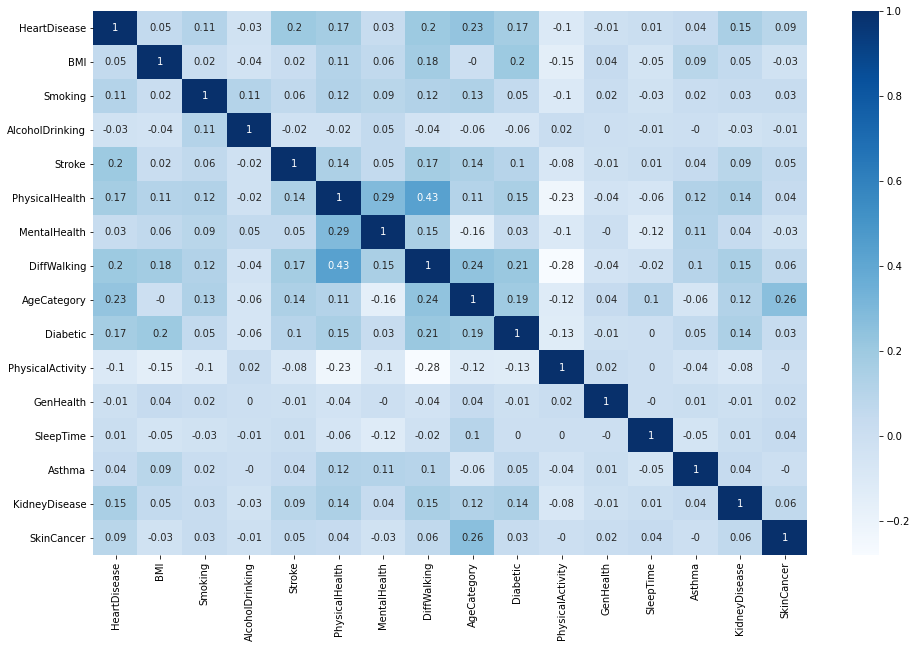

In [83]:
correlation = (df_new.drop(['Sex','Race'],axis = 1)).corr().round(2)
plt.figure(figsize=(16,10))
sns.heatmap(correlation, annot = True, cmap='Blues')

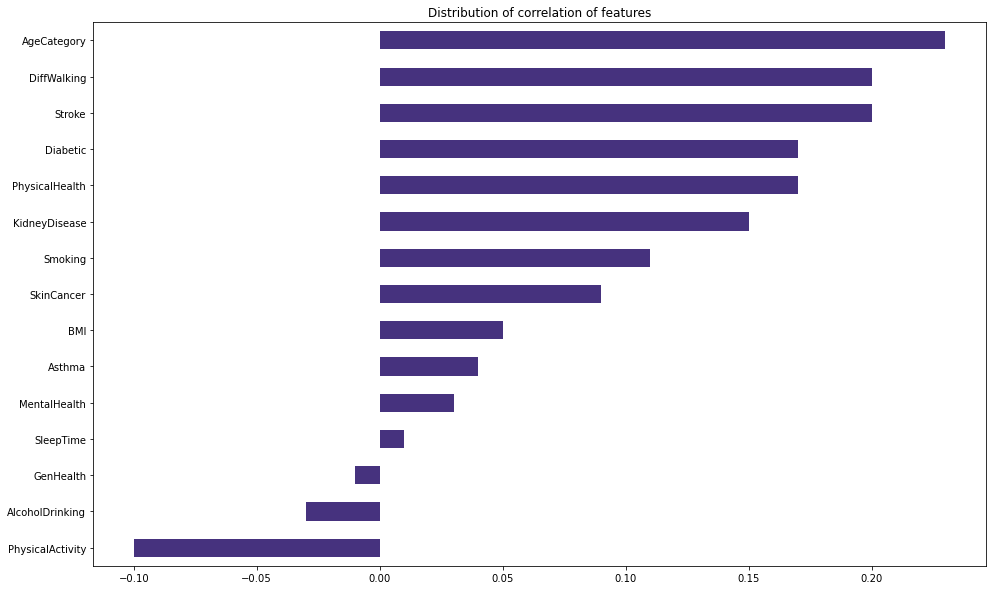

In [106]:
sns.set_palette('viridis')
plt.figure(figsize = (16,10))
plt.title('Distribution of correlation of features')
(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

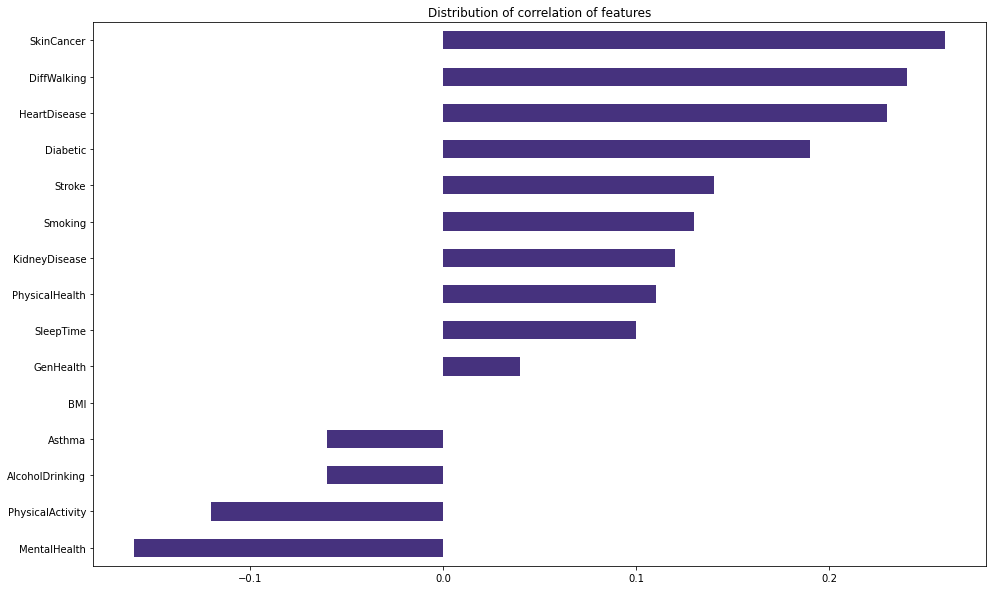

In [107]:
sns.set_palette('viridis')
plt.figure(figsize = (16,10))
plt.title('Distribution of correlation of features')
(correlation['AgeCategory']).sort_values()[:-1].plot.barh()
plt.show()

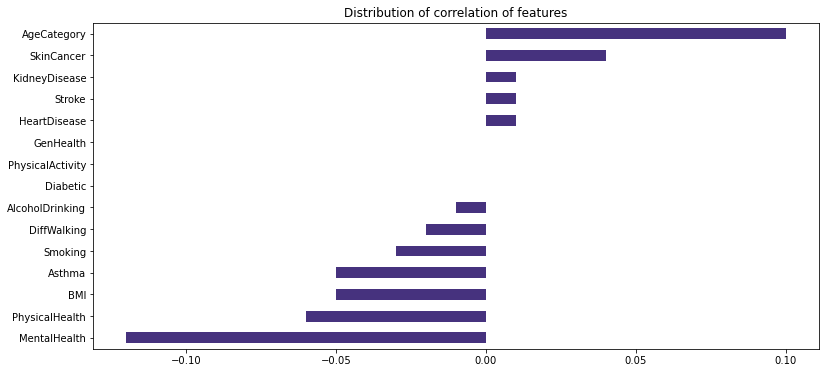

In [105]:
#sns.set_style('white')
sns.set_palette('viridis')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
(correlation['SleepTime']).sort_values()[:-1].plot.barh()
plt.show()

# Analysis

## Habits

In [7]:
df_habits = df[['Smoking','AlcoholDrinking','PhysicalActivity','SleepTime','HeartDisease']]

In [109]:
df_smoking = df_habits['Smoking']=='Yes'
df_no_smoking = df_habits['Smoking']=='No'

print('Smoking')
print('Yes',(df_habits[df_smoking]['HeartDisease']=='Yes').sum()/(df_smoking).sum(), '%')
print('No',(df_habits[df_smoking]['HeartDisease']=='No').sum()/(df_smoking).sum(), '%')

print('No-Smoking')
print('Yes',(df_habits[df_no_smoking]['HeartDisease']=='Yes').sum()/(df_no_smoking).sum(), '%')
print('No',(df_habits[df_no_smoking]['HeartDisease']=='No').sum()/(df_no_smoking).sum(), '%')

Smoking
Yes 0.12540324163101918 %
No 0.8745967583689808 %
No-Smoking
Yes 0.06473449905915829 %
No 0.9352655009408417 %


In [111]:
df_phyactivity = df_habits['PhysicalActivity']=='Yes'
df_no_phyactivity = df_habits['PhysicalActivity']=='No'

print('Physical Activity')
print('Yes',(df_habits[df_phyactivity]['HeartDisease']=='Yes').sum()/(df_phyactivity).sum(), '%')
print('No',(df_habits[df_phyactivity]['HeartDisease']=='No').sum()/(df_phyactivity).sum(), '%')

print('No-Physical Activity')
print('Yes',(df_habits[df_no_phyactivity]['HeartDisease']=='Yes').sum()/(df_no_phyactivity).sum(), '%')
print('No',(df_habits[df_no_phyactivity]['HeartDisease']=='No').sum()/(df_no_phyactivity).sum(), '%')

Physical Activity
Yes 0.07542575907504817 %
No 0.9245742409249518 %
No-Physical Activity
Yes 0.1385877568192974 %
No 0.8614122431807026 %


In [146]:
hours = [2.0,3.0,4.0,5.0,6.0,7.0,8.0, 9.0, 10.0, 11.0, 12.0]
no_sleep_list = []
num_samples = []

for sleep_time in hours:
    print(sleep_time)
    df_sleep = df_habits['SleepTime']>=sleep_time
    df_no_sleep = df_habits['SleepTime']<sleep_time

    print('Sleep')
    print('Yes',(df_habits[df_sleep]['HeartDisease']=='Yes').sum()/(df_sleep).sum(), '%')
    print('No',(df_habits[df_sleep]['HeartDisease']=='No').sum()/(df_sleep).sum(), '%')

    print('No Sleep')
    print('Yes',(df_habits[df_no_sleep]['HeartDisease']=='Yes').sum()/(df_no_sleep).sum(), '%')
    print('No',(df_habits[df_no_sleep]['HeartDisease']=='No').sum()/(df_no_sleep).sum(), '%')

    no_sleep_list.append((df_habits[df_no_sleep]['HeartDisease']=='Yes').sum()/(df_no_sleep).sum())
    num_samples.append(df_no_sleep.sum())

2.0
Sleep
Yes 0.09031896030760445 %
No 0.9096810396923956 %
No Sleep
Yes 0.1088929219600726 %
No 0.8911070780399274 %
3.0
Sleep
Yes 0.09012976982335591 %
No 0.9098702301766441 %
No Sleep
Yes 0.140403286034354 %
No 0.859596713965646 %
4.0
Sleep
Yes 0.08956854544114 %
No 0.91043145455886 %
No Sleep
Yes 0.16061242870009007 %
No 0.8393875712999099 %
5.0
Sleep
Yes 0.08789084003082683 %
No 0.9121091599691732 %
No Sleep
Yes 0.15504927221770184 %
No 0.8449507277822982 %
6.0
Sleep
Yes 0.08659755850564342 %
No 0.9134024414943566 %
No Sleep
Yes 0.1241628539221537 %
No 0.8758371460778464 %
7.0
Sleep
Yes 0.08748670855485742 %
No 0.9125132914451426 %
No Sleep
Yes 0.09660714850712425 %
No 0.9033928514928757 %
8.0
Sleep
Yes 0.10061725767315143 %
No 0.8993827423268486 %
No Sleep
Yes 0.08381000966015782 %
No 0.9161899903398422 %
9.0
Sleep
Yes 0.12905001284262282 %
No 0.8709499871573771 %
No Sleep
Yes 0.08651043488399207 %
No 0.9134895651160079 %
10.0
Sleep
Yes 0.15982456140350876 %
No 0.8401754385964912

[551, 1339, 3331, 11061, 30162, 94817, 184262, 274464, 290317, 298099, 298514]


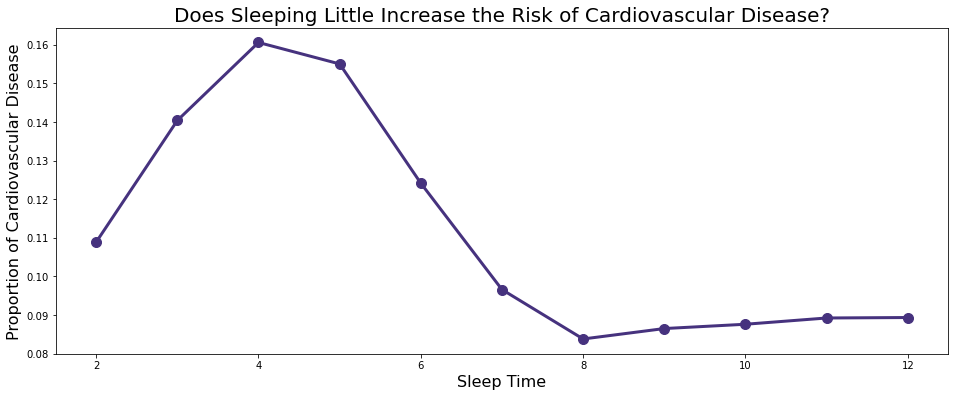

In [158]:
plt.figure(figsize=(16,6))
plt.title('Does Sleeping Little Increase the Risk of Cardiovascular Disease?', fontsize = 20)
plt.plot(hours, no_sleep_list, 'o-', linewidth = 3, markersize = 10)
plt.ylabel('Proportion of Cardiovascular Disease', fontsize = 16)
plt.xlabel('Sleep Time', fontsize = 16)
print(num_samples)

## Personal Data

In [12]:
df_personal = df[['Sex','AgeCategory', 'HeartDisease']]
df_female = df[df['Sex']=='Female']
df_male = df[df['Sex']=='Male']

df_female_with_heartdisase = df_female['HeartDisease']=='Yes'
df_female_without_heartdisease = df_female['HeartDisease']=='No'

df_male_with_heartdisase = df_male['HeartDisease']=='Yes'
df_male_without_heartdisease = df_male['HeartDisease']=='No'


print('Female')
print('Yes', len(df_female[df_female_with_heartdisase])/len(df_female))
print('No',len(df_female[df_female_without_heartdisease])/len(df_female))

print('Male')
print('Yes',len(df_male[df_male_with_heartdisase])/len(df_male))
print('No',len(df_male[df_male_without_heartdisease])/len(df_male))

Female
Yes 0.07022565149588841
No 0.9297743485041116
Male
Yes 0.11297748616645312
No 0.8870225138335469


<AxesSubplot:>

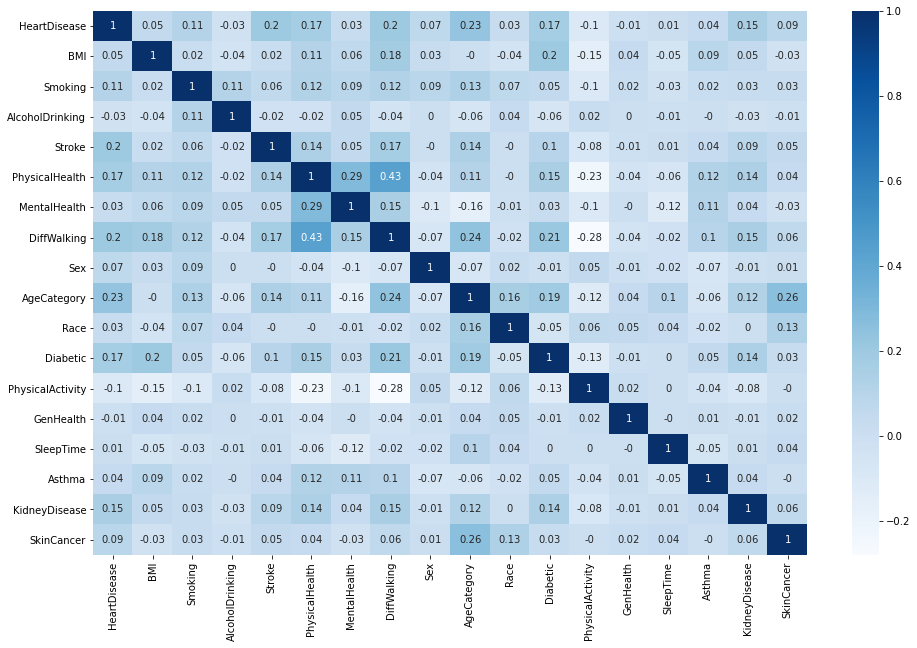